# Data exploration

This notebook is for initial data exploration, it is not focused on answering the case study questions

In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv('../data/train.csv')

In [4]:
df_train.head()

,day_id,but_num_business_unit,dpt_num_department,turnover
0,2017-09-30,64,127,580.308443
1,2017-09-30,119,127,1512.995918
2,2017-09-30,4,88,668.593556
3,2017-09-30,425,127,0.000000
4,2017-09-30,513,73,0.000000


In [5]:
df_train.dtypes

day_id                    object
but_num_business_unit      int64
dpt_num_department         int64
turnover                 float64
dtype: object

In [6]:
df_train.describe()

,but_num_business_unit,dpt_num_department,turnover
count,277719.000000,277719.000000,277719.000000
mean,294.199464,101.288832,561.818472
std,291.664511,21.667318,2113.229765
min,1.000000,73.000000,-69.791165
25%,81.000000,88.000000,11.785140
50%,204.000000,88.000000,232.724186
75%,427.000000,127.000000,676.655825
max,1887.000000,127.000000,1000000.000000


In [7]:
df_train.isnull().sum()

day_id                   0
but_num_business_unit    0
dpt_num_department       0
turnover                 0
dtype: int64

In [8]:
df_test = pd.read_csv('../data/test.csv')

In [9]:
df_test.head()

,day_id,but_num_business_unit,dpt_num_department
0,2017-11-25,95,73
1,2017-11-25,4,117
2,2017-11-25,113,127
3,2017-11-25,93,117
4,2017-11-25,66,127


In [10]:
df_test.dtypes

day_id                   object
but_num_business_unit     int64
dpt_num_department        int64
dtype: object

In [11]:
df_test.describe()

,but_num_business_unit,dpt_num_department
count,10136.000000,10136.000000
mean,414.886346,101.207577
std,445.932616,21.679104
min,1.000000,73.000000
25%,95.000000,88.000000
50%,237.000000,88.000000
75%,549.000000,117.000000
max,1887.000000,127.000000


In [12]:
df_test.isnull().sum()

day_id                   0
but_num_business_unit    0
dpt_num_department       0
dtype: int64

In [13]:
df_bu_feat = pd.read_csv('../data/bu_feat.csv')

In [14]:
df_bu_feat.head()

,but_num_business_unit,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr
0,1609,80100,50.096306,1.867220,69,4
1,1995,95700,48.991087,2.520903,3,6
2,1800,73210,45.552933,6.644736,51,4
3,238,47550,44.175370,0.638869,134,10
4,201,13546,43.508418,5.406423,71,10


In [15]:
df_bu_feat.dtypes

but_num_business_unit      int64
but_postcode               int64
but_latitude             float64
but_longitude            float64
but_region_idr_region      int64
zod_idr_zone_dgr           int64
dtype: object

In [16]:
df_bu_feat.describe()

,but_num_business_unit,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr
count,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,435.162577,51203.460123,47.002270,2.637551,63.199387,12.202454
std,474.138722,26716.870578,2.333283,2.786303,47.901374,18.605263
min,1.000000,1100.000000,41.954300,-4.436446,2.000000,1.000000
25%,97.250000,31000.000000,44.959619,0.707571,31.000000,4.000000
50%,242.500000,56050.000000,47.373887,2.598707,64.000000,6.000000
75%,553.750000,74575.000000,48.885216,4.904543,74.000000,10.000000
max,1995.000000,98000.000000,51.050275,8.796100,178.000000,72.000000


## Visualizing with plots

In [17]:
df_train['day_id'] = pd.to_datetime(df_train['day_id'], format='%Y-%m-%d')

dpt_num_department
73     Axes(0.125,0.2;0.775x0.68)
88     Axes(0.125,0.2;0.775x0.68)
117    Axes(0.125,0.2;0.775x0.68)
127    Axes(0.125,0.2;0.775x0.68)
dtype: object

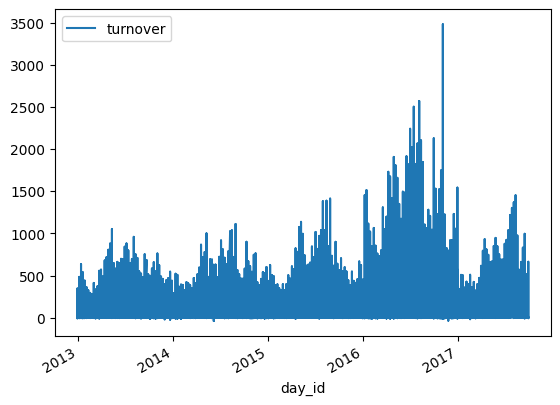

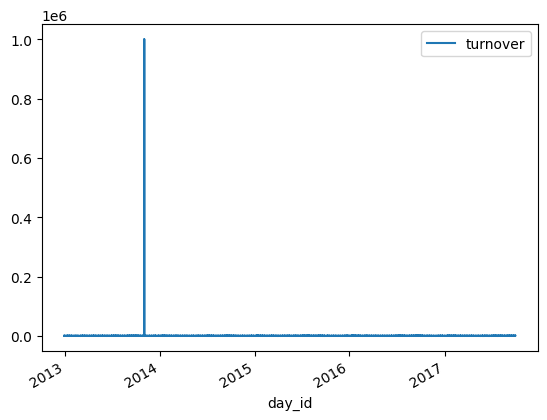

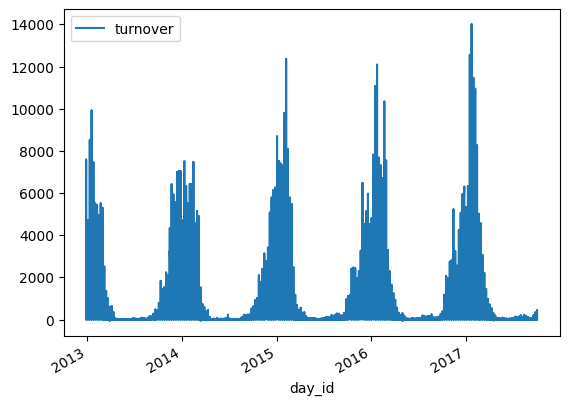

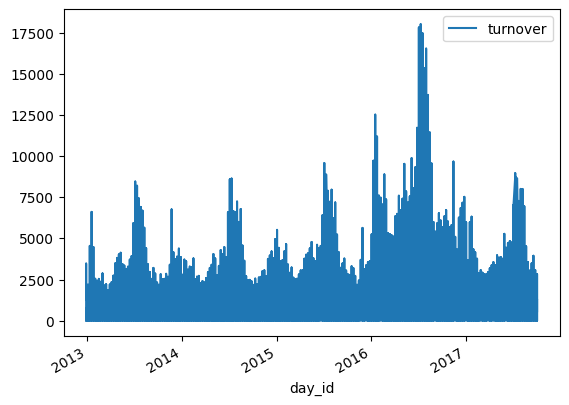

In [18]:
df_train.groupby('dpt_num_department').plot(x='day_id', y='turnover')

Dep 73 : pattern annuel avec une très bonne année 2016  
Dep 88 : gros outlier fin 2013 qui écrase le graphe, à nettoyer  
Dep 117 : très forte saisonnalité (fort autour du mois de décembre faible en été => affaire d'hiver /ski)  
Dep 127 : similaire au 73 dans l'idée

In [19]:
#df_train.groupby('but_num_business_unit').plot(x='day_id', y='turnover')
# 322 unique BUSINESS UNITS -> too many to plot

In [20]:
df_train.value_counts('dpt_num_department')

dpt_num_department
88     70230
127    69442
117    69387
73     68660
Name: count, dtype: int64

In [21]:
df_train.value_counts('but_num_business_unit')

but_num_business_unit
1       996
188     996
242     996
243     996
249     996
       ... 
1881     74
1869     68
1876     56
1887     53
1882     49
Name: count, Length: 322, dtype: int64

## Map of Bu Feat

In [22]:
import plotly.express as px

In [32]:
df_bu_feat.value_counts('but_region_idr_region')

but_region_idr_region
178    27
70     16
75     14
65     14
69     13
30     13
52     12
72     12
66     12
3      12
55     12
2      12
51     12
7      12
31     11
74     11
71     11
53     10
134    10
4      10
6      10
8      10
64     10
32      9
107     9
115     9
33      9
121     3
162     1
Name: count, dtype: int64

In [35]:
df_bu_feat.value_counts('zod_idr_zone_dgr')

zod_idr_zone_dgr
6     96
4     92
10    89
72    27
1      9
3      9
35     3
59     1
Name: count, dtype: int64

In [44]:
fig = px.scatter_mapbox(
    df_bu_feat, 
    lat="but_latitude", 
    lon="but_longitude",     
    color="but_region_idr_region",
    zoom=11,
    center=dict(lat=48.8566, lon=2.3522),
    )
fig.update_layout(mapbox_style="open-street-map",
                )
fig.show()

Je reconnais l'emplacement des magasins proches de chez moi : Rive Gauche et Porte de Montreuil.